In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers


import warnings
warnings.filterwarnings("ignore")

## **Assgining Training and test data**

In [ ]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32
train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)


In [ ]:
train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/al exam/Dataset/CNN/Shoe Classification/train",
                                          target_size=(IMG_WIDTH, IMG_HEIGHT),
                                          batch_size=BATCH_SIZE,
                                          class_mode='categorical'
                                          )

Found 778 images belonging to 3 classes.


In [ ]:
image_size = 200
path = r"/content/drive/MyDrive/al exam/Dataset/CNN/Shoe Classification/train"

test = train_datagen.flow_from_directory(path,
                                         target_size=(IMG_WIDTH, IMG_HEIGHT),
                                          batch_size=BATCH_SIZE,
                                          class_mode='categorical',
                                          subset='validation')

Found 193 images belonging to 3 classes.


In [ ]:
len(path)

67

In [ ]:
train.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [ ]:
labels = {value: key for key, value in train.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Boots
1 : Sandals
2 : Slippers


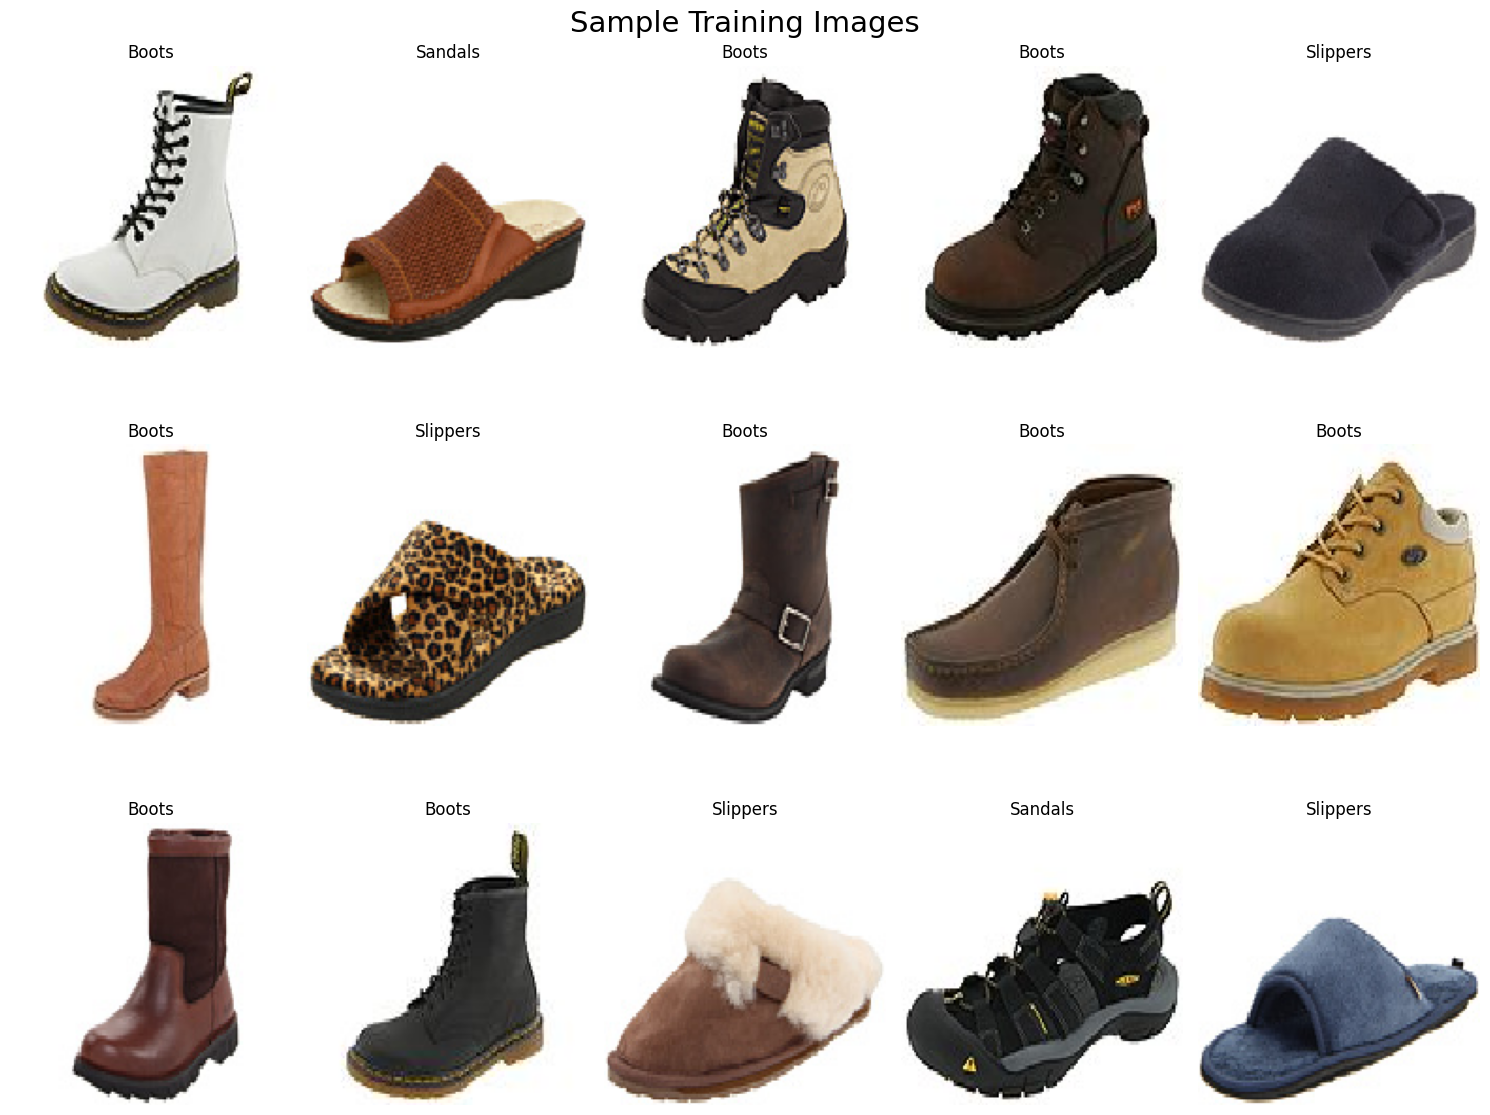

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(5):
        label = labels[np.argmax(train[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32, 3)


# Training a CNN Model
# New Section

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

model=tf.keras.models.Sequential()
model.add(layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# *Compiling*

In [ ]:

epochs = 12 # awalnya 20

tf.random.set_seed(1)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 524,195 (2.00 MB)

 Trainable params: 524,195 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
result = model.fit(train,
                   validation_data=test,
                   epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.4436 - loss: 1.0240 - val_accuracy: 0.7513 - val_loss: 0.5408
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7498 - loss: 0.5428 - val_accuracy: 0.7979 - val_loss: 0.4349
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8354 - loss: 0.3690 - val_accuracy: 0.8912 - val_loss: 0.3206
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8415 - loss: 0.3324 - val_accuracy: 0.9223 - val_loss: 0.2764
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8989 - loss: 0.2657 - val_accuracy: 0.9534 - val_loss: 0.2589
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9266 - loss: 0.2022 - val_accuracy: 0.9378 - val_loss: 0.2455
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9138 - loss: 0.2065 - val_accuracy: 0.9585 - val_loss: 0.1486
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9253 - loss: 0.1879 - val_accuracy: 0.9482 - val_loss

In [ ]:
model.save('shoe_classifier.h5')

In [ ]:
!pip install keras-preprocessing
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
new_model = load_model("shoe_classifier.h5")

# Prediction

In [ ]:
from PIL import Image
def model_output(dir_addr):
    my_img = image.load_img(dir_addr, target_size=(150,150))
    plt.imshow(my_img)
    plt.show()

    my_img = image.img_to_array(my_img)
    my_img = np.expand_dims(my_img, axis= 0)

    reverse_mapping = dict(zip([0, 1, 2], ['Boot', 'Sandal', 'Slippers']))

    def mapper(val):
        return reverse_mapping[val]

    pred = new_model.predict(my_img)
    value = np.argmax(pred)
    shoe_name = mapper(value)
    print("Prediction is {}.".format(shoe_name))

    print(str(pred)+'\n')

In [ ]:
import os
os.chdir(r"/content/drive/MyDrive/al exam/Dataset/CNN/Shoe Classification/test")

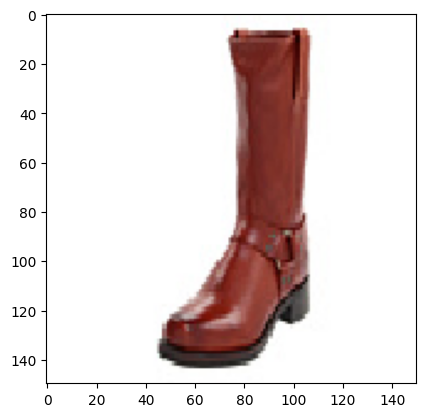

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Prediction is Boot.
[[1. 0. 0.]]



In [ ]:
model_output(r"/content/drive/MyDrive/al exam/Dataset/CNN/Shoe Classification/test/image (2).jpg")

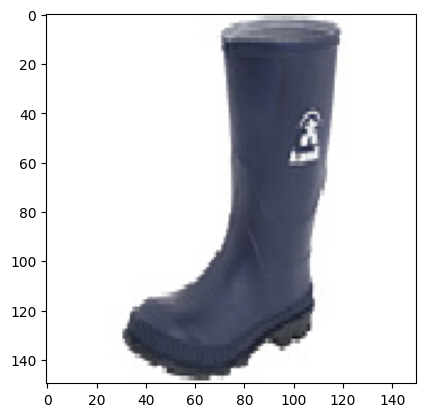

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction is Boot.
[[1. 0. 0.]]



In [ ]:
model_output(r"/content/drive/MyDrive/al exam/Dataset/CNN/Shoe Classification/test/image (23).jpg")

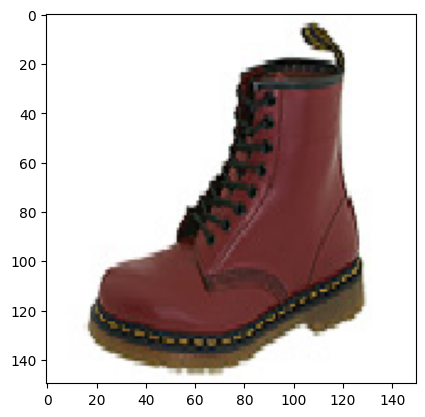

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction is Boot.
[[1. 0. 0.]]



In [ ]:
model_output(r"/content/drive/MyDrive/al exam/Dataset/CNN/Shoe Classification/test/image (7).jpg")

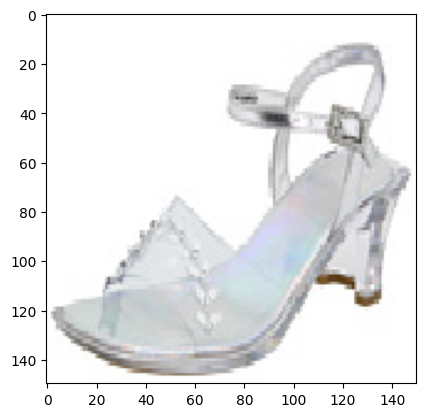

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction is Sandal.
[[0. 1. 0.]]



In [ ]:
model_output(r"/content/drive/MyDrive/al exam/Dataset/CNN/Shoe Classification/test/image (30).jpg")

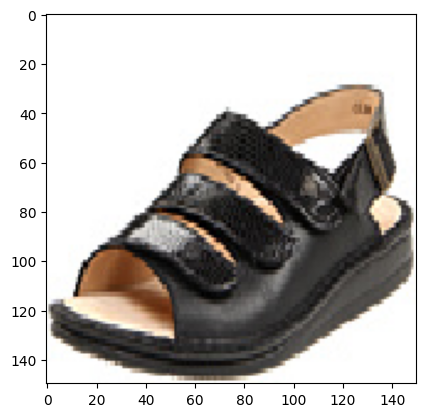

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction is Sandal.
[[0. 1. 0.]]



In [ ]:
model_output(r"/content/drive/MyDrive/al exam/Dataset/CNN/Shoe Classification/test/image (1).jpg")

# Accuracy of train and test

In [ ]:
score = model.evaluate(train,verbose=0)
print("Accuracy and loss of model-----------------------------------------------")
print('Train Loss : {:.4f}'.format(score[0]))
print('Train Accuracy : {:.4f}'.format(score[1]))

Accuracy and loss of model-----------------------------------------------
Train Loss : 0.1443
Train Accuracy : 0.9563


In [ ]:
score = model.evaluate(test,verbose=0)
print("Accuracy and loss of model-----------------------------------------------")
print('Train Loss : {:.4f}'.format(score[0]))
print('Train Accuracy : {:.4f}'.format(score[1]))

Accuracy and loss of model-----------------------------------------------
Train Loss : 0.1242
Train Accuracy : 0.9741
